# Project Overview

## Predicting Project Role Suitability for Software Engineering Course Using Machine Learning Techniques

### Short Problem Description
    Predicting the suited software engineering role of a student taking up software engineering course at the WESTERN MINDANAO STATE UNIVERSITY-COLLEGE OF COMPUTING STUDIES.
    The 5 roles are: 
        -Project Manager
        -Lead Developer
        -Business Analyst
        -UI/UX Designer
        -Quality Assuarance Engineer

### Data was gathered from 3rd and 4th year studends of the COLLEGE OF COMPUTING STUDIES of the academic year 2021-2022.
        
### Description of columns/feautures
    The main feautures:
        -Program: The program/course of a student e.g. BS in Computer Science
        -COMPROG1: The grade of the student in this subject which is the Computer Programming 1
        -COMPROG2: The grade of the student in this subject which is the Computer Programming 2
        -INTRO TO COMPUTING: The grade of the student in this subject which is the INTRODUCTION TO COMPUTING
        -INFO MANAGEMENT: The grade of the student in this subject which is the INFORMATION MANAGEMENT
        -OOP: The grade of the student in this subject which is the OBJECT ORIENTED PROGRAMMING
        -HCI: The grade of the student in this subject which is the HUMAN COMPUTER INTERACTION
        -DATA STRUCTURES AND ALGO: The grade of the student in this subject which is the DATA STRUCTURES AND ALGORITHM
        -PERSONALITY TYPE TEST RESULT: The personality type of the student e.g. ENFJ
        -MULTIPLE INTELLIGENCE RESULT: The multiple intelligence/s of the student. e.g. Logical
        
    The derived feautures:
        -COMPROG1_4_units: The sum of the grade and number of units in the subject Computer Programming 1
        -COMPROG2_4_units: The sum of the grade and number of units in the subject Computer Programming 2
        -INTRO_TO_COMPUTING_3_units: The sum of the grade and number of units in the subject INTRODUCTION TO COMPUTING
        -INFO_MANAGEMENT_4_units: The sum of the grade and number of units in the subject INFORMATION MANAGEMENT
        -OOP_4_units: The sum of the grade and number of units in the subject OBJECT ORIENTED PROGRAMMING
        -HCI_1_units: The sum of the grade and number of units in the subject HUMAN COMPUTER INTERACTION
        -DATA STRUCTURES_AND_ALGO_4_units: The sum of the grade and number of units in the subject DATA STRUCTURES AND ALGORITHM 
        -Programming_AVG: The average grade of the 4 programming courses which are Computer Programming 1, Computer Programming 2, INFORMATION MANAGEMENT, and OBJECT ORIENTED PROGRAMMING
        -GPA: The General Percentile Average of the 7 common major subjects of BSCS and BSIT students.
    
    The dependent/output variables:
        -MAIN_ROLE: Main role of the student in the Software Engineering Course.
        -SECONDARY_ROLE: Secondary role of the student in the Software Engineering Course.

### General Objective:
    The general objective of this study is to develop software to predict which is the best role suited for students who are taking software engineering courses within the College of Computing Studies at Western Mindanao State University.

### Specific Objectives: 
    1.	To create 3 different classification machine learning models (Logistic regression, Naïve Bayes, and Decision tree) to predict the best role suited for students who are taking software engineering courses,
    2.	To compare each created machine learning models using k-fold cross-validation and identity which has the highest score,
    3.	To evaluate the 3 different models using evaluation metrics such as accuracy and confusion matrix,
    4.	To integrate the highest predictive machine learning model into the system called “BeSER”, 
    5.	To, develop “BeSER” a system that stands for “Best Software Engineering Role” for computer science and IT students who are taking up software engineering courses to help them decide on which role is best suited for them.



# Exploring dataset and performing pre-processing.

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import missingno as msno

#IMPORTS OHD FOR CONVERTING CLASSIFICATION FEATURES INTO NUMERICAL FEATURES.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#IMPORTING CSV FILE INTO DATA FRAME
df = pd.read_csv('datasets/FINAL-CSV(main-role).csv')

In [3]:
df

,Name,Program,COMPROG 1,COMPROG 2,INTRO TO COMPUTING,INFO MANAGEMENT,OOP,HCI,DATA STRUCTURES AND ALGO,COMPROG1_4_units,...,INTRO_TO_COMPUTING_3_units,INFO_MANAGEMENT_4_units,OOP_4_units,HCI_1_units,DATA STRUCTURES_AND_ALGO_4_units,Programming_AVG,GPA,PERSONALITY TYPE TEST RESULT,MULTIPLE INTELLIGENCE RESULT,MAIN ROLE
0,AbiegailAmparo,0,1.50,1.75,2.00,2.50,1.75,1.75,1.25,6,...,6.00,10,7,1.75,5,1.88,1.78,ESFJ,VISUAL,PROJECT MANAGER
1,AGCAOLI,0,1.75,2.00,1.75,2.75,1.75,1.50,1.75,7,...,5.25,11,7,1.50,7,2.06,1.95,INFP,NATURALISTIC,LEAD PROGRAMMER
2,ALBIENABARRO,0,1.50,2.00,1.50,3.00,2.00,2.50,1.50,6,...,4.50,12,8,2.50,6,2.13,1.96,ESTP,MUSICAL,BUSINESS ANALYST
3,AmerEmam,0,1.75,2.25,2.25,1.50,2.50,3.00,1.50,7,...,6.75,6,10,3.00,6,2.00,1.99,ESTP,NATURALISTIC,LEAD PROGRAMMER
4,ANDAN,1,2.25,1.75,1.50,2.75,1.75,2.50,1.50,9,...,4.50,11,7,2.50,6,2.13,1.96,ESTJ,MUSICAL&NATURALISTIC,QA ENGINEER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,USMAN,0,2.50,1.00,1.25,2.00,2.25,2.50,2.50,7,...,3.75,8,9,2.50,10,2.13,2.09,ESTJ,MUSICAL,BUSINESS ANALYST
146,YVANJOETINGUHA,0,1.50,1.50,3.00,3.00,1.75,2.00,1.50,8,...,8.25,12,7,2.00,6,2.06,2.05,ISTJ,EXISTENTIAL,PROJECT MANAGER
147,TUBAN,0,3.00,2.00,1.75,2.50,2.00,2.25,1.50,8,...,5.25,10,8,2.25,6,2.13,1.98,ENFP,LOGICAL,LEAD PROGRAMMER
148,USMAN,1,2.00,2.00,1.25,2.00,2.25,2.50,2.50,7,...,3.75,8,9,2.50,10,2.13,2.09,ENFJ,INTRAPERSONAL,BUSINESS ANALYST


In [68]:
df.shape
df.isnull().sum()

Program                             0
COMPROG 1                           0
COMPROG 2                           0
INTRO TO COMPUTING                  0
INFO MANAGEMENT                     0
OOP                                 0
HCI                                 0
DATA STRUCTURES AND ALGO            0
COMPROG1_4_units                    0
COMPROG2_4_units                    0
INTRO_TO_COMPUTING_3_units          0
INFO_MANAGEMENT_4_units             0
OOP_4_units                         0
HCI_1_units                         0
DATA STRUCTURES_AND_ALGO_4_units    0
Programming_AVG                     0
GPA                                 0
ENFJ                                0
ENFP                                0
ENTJ                                0
ENTP                                0
ESFJ                                0
ESFP                                0
ESTJ                                0
ESTP                                0
INFJ                                0
INFP        

<AxesSubplot:>

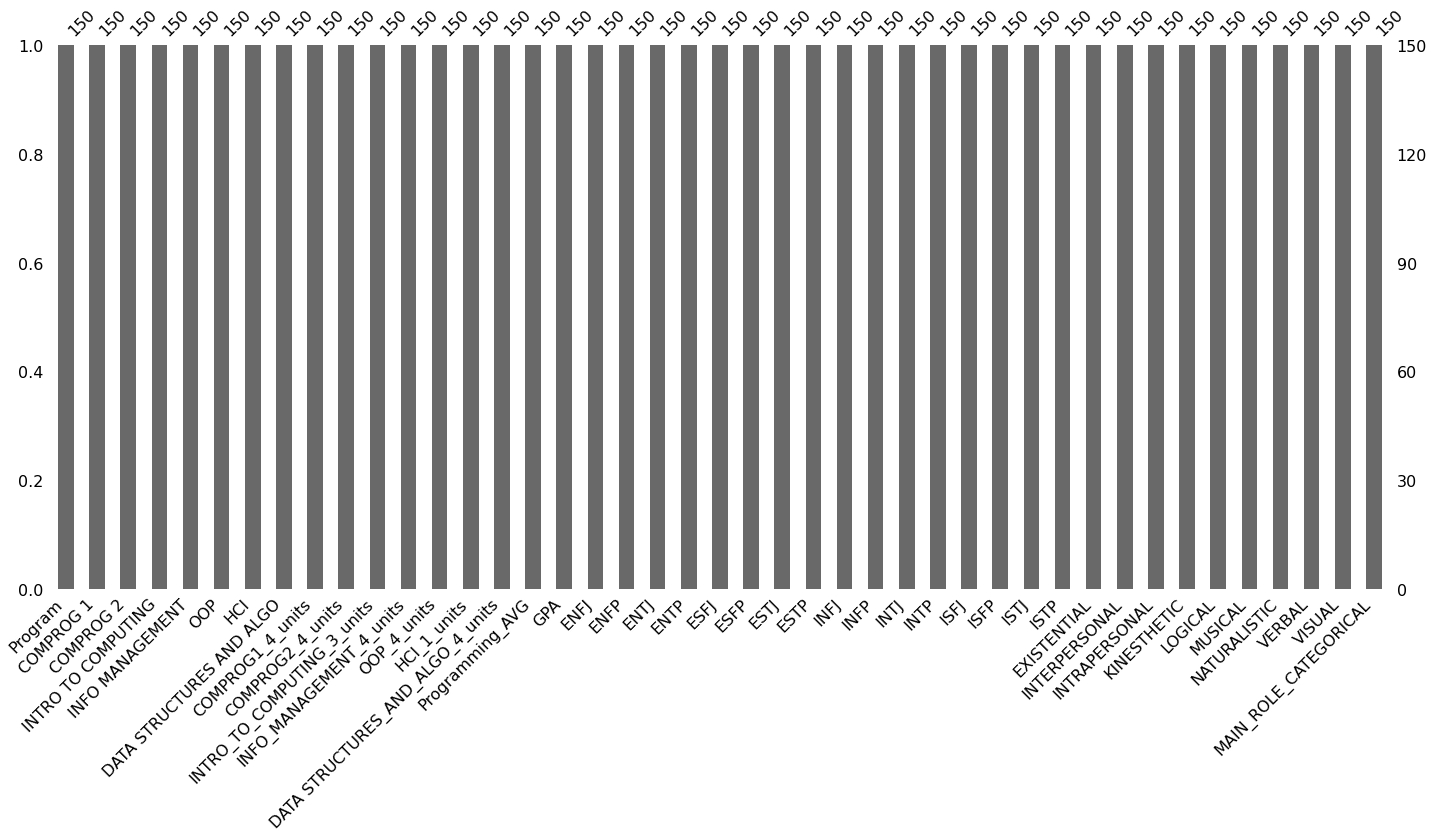

In [69]:
msno.bar(df)

In [5]:
df["PERSONALITY TYPE TEST RESULT"].unique()

array(['ESFJ', 'INFP', 'ESTP', 'ESTJ', 'ISFP', 'ISTJ', 'ISFJ', 'INTP',
       'ENTP', 'ESFP', 'ENTJ', 'ISTP', 'INFJ', 'ENFJ', 'INTJ', 'ENFP'],
      dtype=object)

In [6]:
df["MULTIPLE INTELLIGENCE RESULT"].unique()

array(['VISUAL', 'NATURALISTIC', 'MUSICAL', 'MUSICAL&NATURALISTIC',
       'MUSICAL&VISUAL', 'VISUAL&MUSICAL', 'LOGICAL&MUSICAL',
       'NATURALISTIC&VERBAL', 'LOGICAL&NATURALISTIC', 'LOGICAL', 'VERBAL',
       'NATURALISTIC&VISUAL', 'INTERPERSONAL', 'INTERPERSONAL&MUSICAL',
       'VERBAL&INTERPERSONAL', 'VISUAL&INTERPERSONAL&MUSICAL',
       'LOGICAL&INTERPERSONAL', 'LOGICAL&VISUAL&MUSICAL&NATURALISTIC',
       'VERBAL&LOGICAL', 'MUSICAL&INTERPERSONAL',
       'VISUAL&MUSICAL&NATURALISTIC', 'VISUAL&NATURALISTIC',
       'LOGICAL&VISUAL', 'KINESTHETIC', 'EXISTENTIAL', 'INTRAPERSONAL'],
      dtype=object)

In [7]:
df["MAIN ROLE"].unique()

array(['PROJECT MANAGER', 'LEAD PROGRAMMER', 'BUSINESS ANALYST',
       'QA ENGINEER', 'UI/UX DESIGNER'], dtype=object)

In [8]:
df.isna().sum()

Name                                0
Program                             0
COMPROG 1                           0
COMPROG 2                           0
INTRO TO COMPUTING                  0
INFO MANAGEMENT                     0
OOP                                 0
HCI                                 0
DATA STRUCTURES AND ALGO            0
COMPROG1_4_units                    0
COMPROG2_4_units                    0
INTRO_TO_COMPUTING_3_units          0
INFO_MANAGEMENT_4_units             0
OOP_4_units                         0
HCI_1_units                         0
DATA STRUCTURES_AND_ALGO_4_units    0
Programming_AVG                     0
GPA                                 0
PERSONALITY TYPE TEST RESULT        0
MULTIPLE INTELLIGENCE RESULT        0
MAIN ROLE                           0
dtype: int64

In [9]:
df.drop(columns = ['Name'], inplace=True)

In [10]:
df

,Program,COMPROG 1,COMPROG 2,INTRO TO COMPUTING,INFO MANAGEMENT,OOP,HCI,DATA STRUCTURES AND ALGO,COMPROG1_4_units,COMPROG2_4_units,INTRO_TO_COMPUTING_3_units,INFO_MANAGEMENT_4_units,OOP_4_units,HCI_1_units,DATA STRUCTURES_AND_ALGO_4_units,Programming_AVG,GPA,PERSONALITY TYPE TEST RESULT,MULTIPLE INTELLIGENCE RESULT,MAIN ROLE
0,0,1.50,1.75,2.00,2.50,1.75,1.75,1.25,6,7,6.00,10,7,1.75,5,1.88,1.78,ESFJ,VISUAL,PROJECT MANAGER
1,0,1.75,2.00,1.75,2.75,1.75,1.50,1.75,7,8,5.25,11,7,1.50,7,2.06,1.95,INFP,NATURALISTIC,LEAD PROGRAMMER
2,0,1.50,2.00,1.50,3.00,2.00,2.50,1.50,6,8,4.50,12,8,2.50,6,2.13,1.96,ESTP,MUSICAL,BUSINESS ANALYST
3,0,1.75,2.25,2.25,1.50,2.50,3.00,1.50,7,9,6.75,6,10,3.00,6,2.00,1.99,ESTP,NATURALISTIC,LEAD PROGRAMMER
4,1,2.25,1.75,1.50,2.75,1.75,2.50,1.50,9,7,4.50,11,7,2.50,6,2.13,1.96,ESTJ,MUSICAL&NATURALISTIC,QA ENGINEER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,2.50,1.00,1.25,2.00,2.25,2.50,2.50,7,10,3.75,8,9,2.50,10,2.13,2.09,ESTJ,MUSICAL,BUSINESS ANALYST
146,0,1.50,1.50,3.00,3.00,1.75,2.00,1.50,8,6,8.25,12,7,2.00,6,2.06,2.05,ISTJ,EXISTENTIAL,PROJECT MANAGER
147,0,3.00,2.00,1.75,2.50,2.00,2.25,1.50,8,8,5.25,10,8,2.25,6,2.13,1.98,ENFP,LOGICAL,LEAD PROGRAMMER
148,1,2.00,2.00,1.25,2.00,2.25,2.50,2.50,7,10,3.75,8,9,2.50,10,2.13,2.09,ENFJ,INTRAPERSONAL,BUSINESS ANALYST


# Data Visualization

In [11]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from pandas import DataFrame


<function matplotlib.pyplot.show(close=None, block=None)>

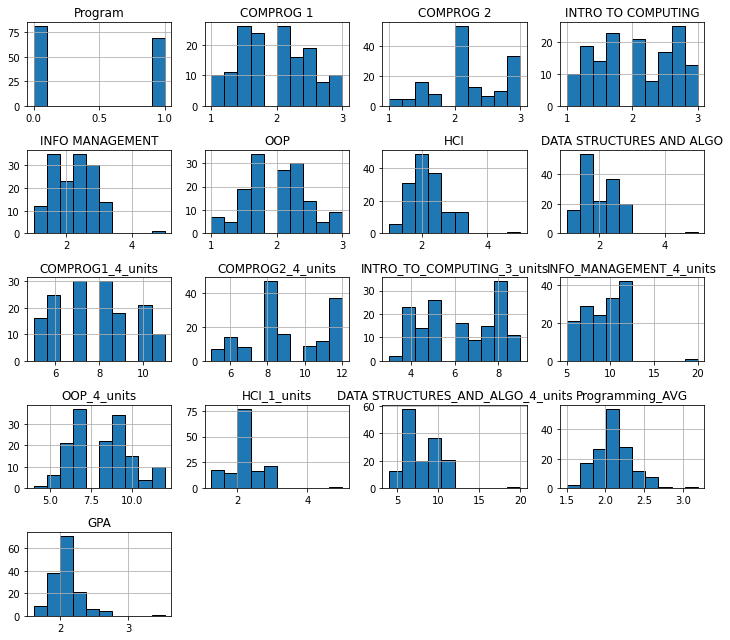

In [12]:
#plot histogram of raw data
df.hist(figsize=(10,9), ec="k")
plt.title('Raw SE Role Data')
plt.tight_layout()
plt.show

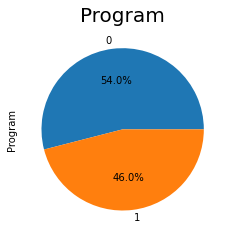

In [13]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Program',fontsize = 20)
df['Program'].value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

#Based on the number of respondents (real data) and data augmented records.
# 0 for BS in Information Technology and 1 for BS in Computer Science

C:\Users\drene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


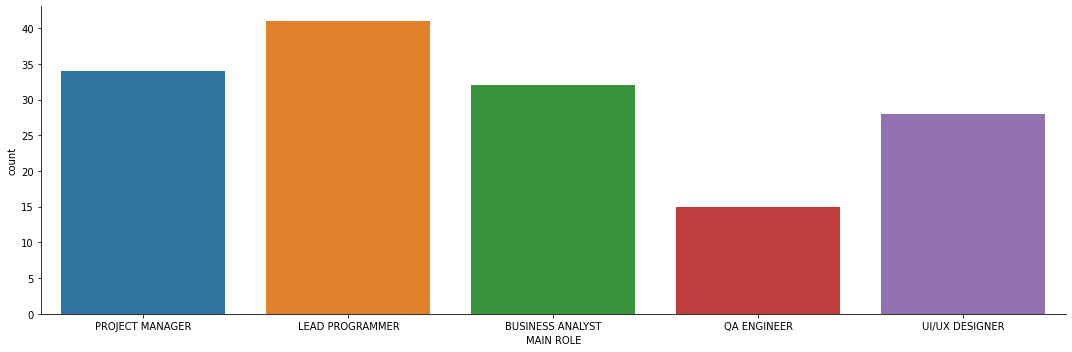

In [14]:
sns.catplot('MAIN ROLE', data=df, kind='count', aspect=12/4)


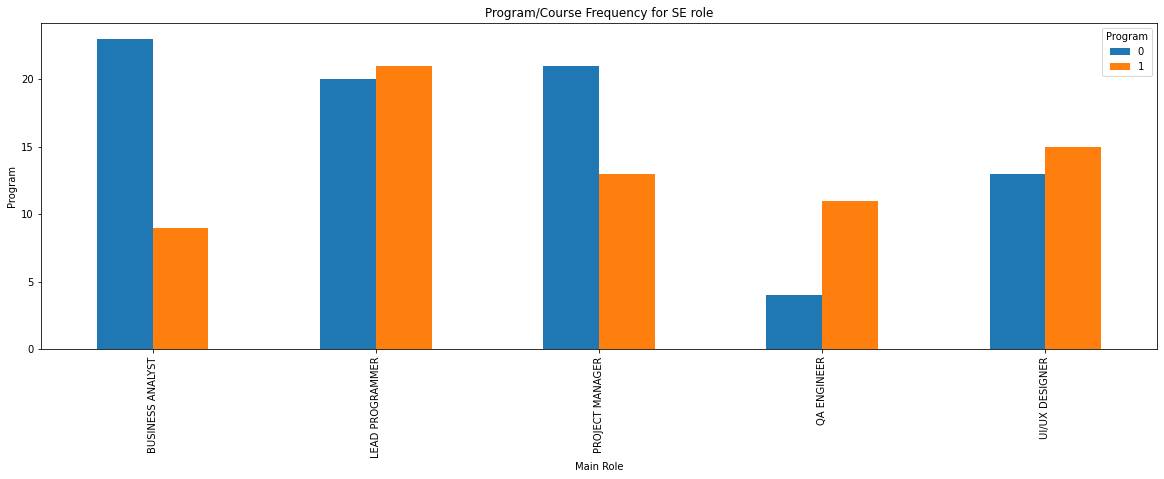

In [15]:
pd.crosstab(df['MAIN ROLE'],df.Program).plot(kind="bar",figsize=(20,6))
plt.title('Program/Course Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Program')
plt.show()

# Program: 0 for BS in Information Technology and 1 for BS in Computer Science

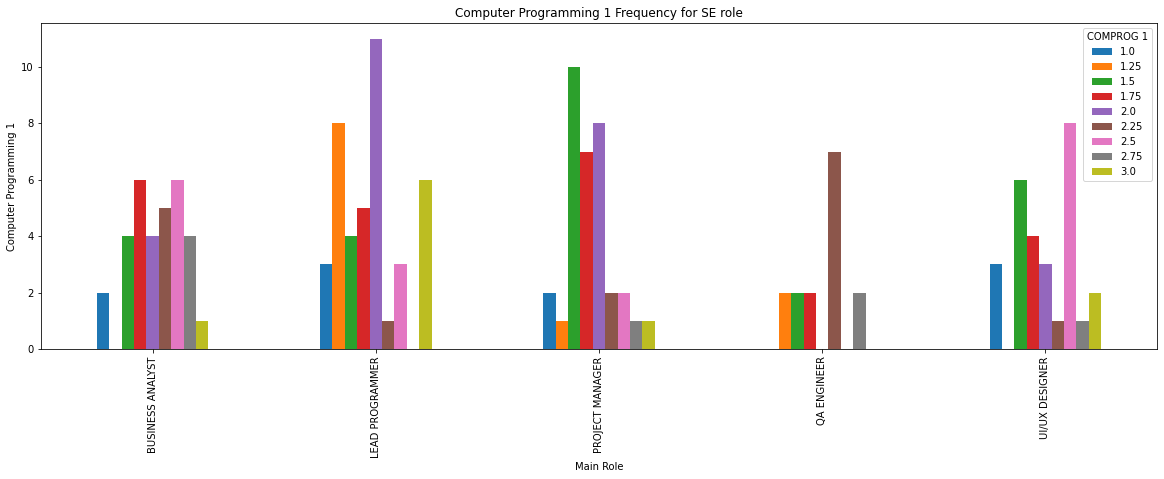

In [16]:
pd.crosstab(df['MAIN ROLE'],df['COMPROG 1']).plot(kind="bar",figsize=(20,6))
plt.title('Computer Programming 1 Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Computer Programming 1')
plt.show()

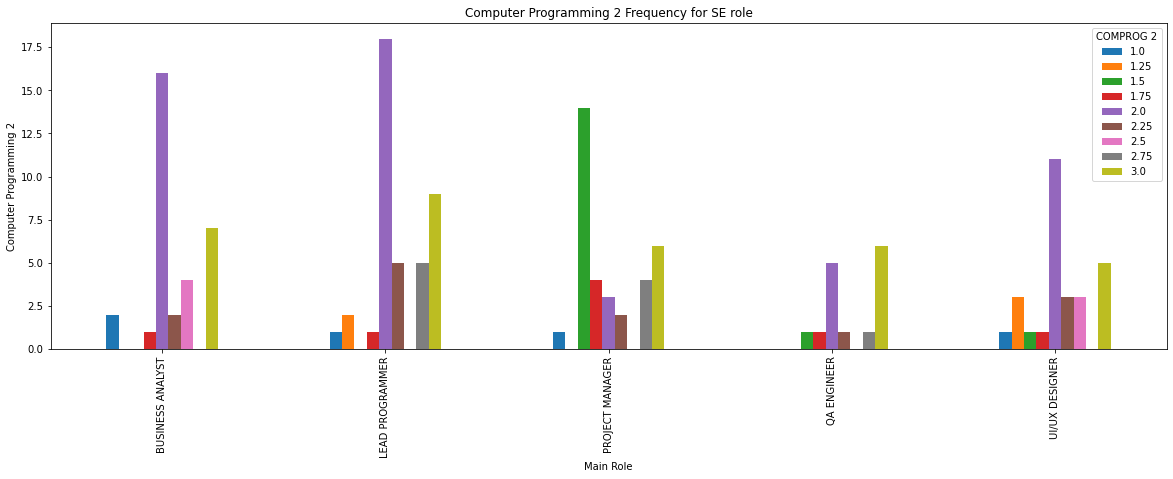

In [17]:
pd.crosstab(df['MAIN ROLE'],df['COMPROG 2']).plot(kind="bar",figsize=(20,6))
plt.title('Computer Programming 2 Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Computer Programming 2')
plt.show()

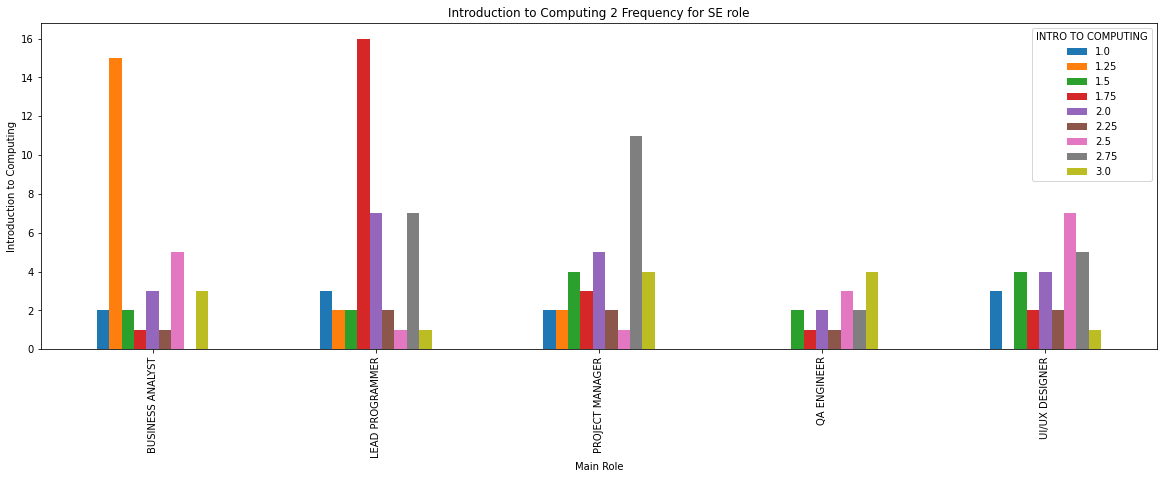

In [18]:
pd.crosstab(df['MAIN ROLE'],df['INTRO TO COMPUTING']).plot(kind="bar",figsize=(20,6))
plt.title('Introduction to Computing 2 Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Introduction to Computing')
plt.show()

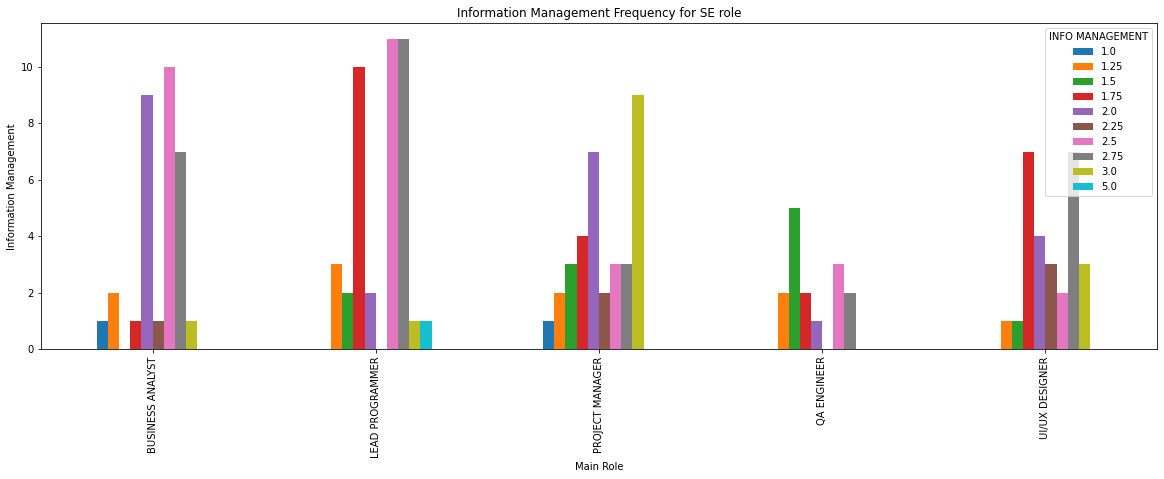

In [19]:
pd.crosstab(df['MAIN ROLE'],df['INFO MANAGEMENT']).plot(kind="bar",figsize=(20,6))
plt.title('Information Management Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Information Management')
plt.show()

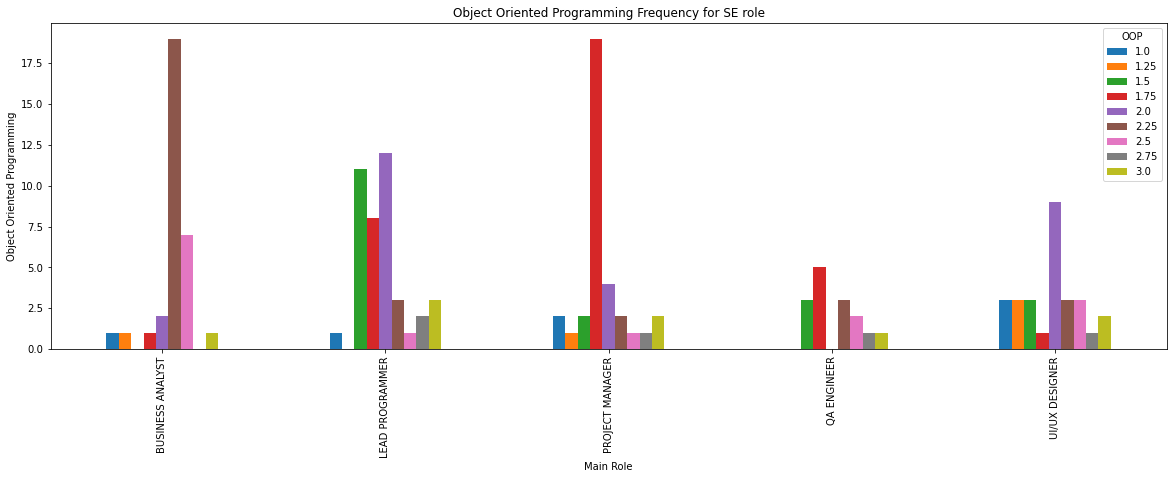

In [20]:
pd.crosstab(df['MAIN ROLE'],df['OOP']).plot(kind="bar",figsize=(20,6))
plt.title('Object Oriented Programming Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Object Oriented Programming')
plt.show()

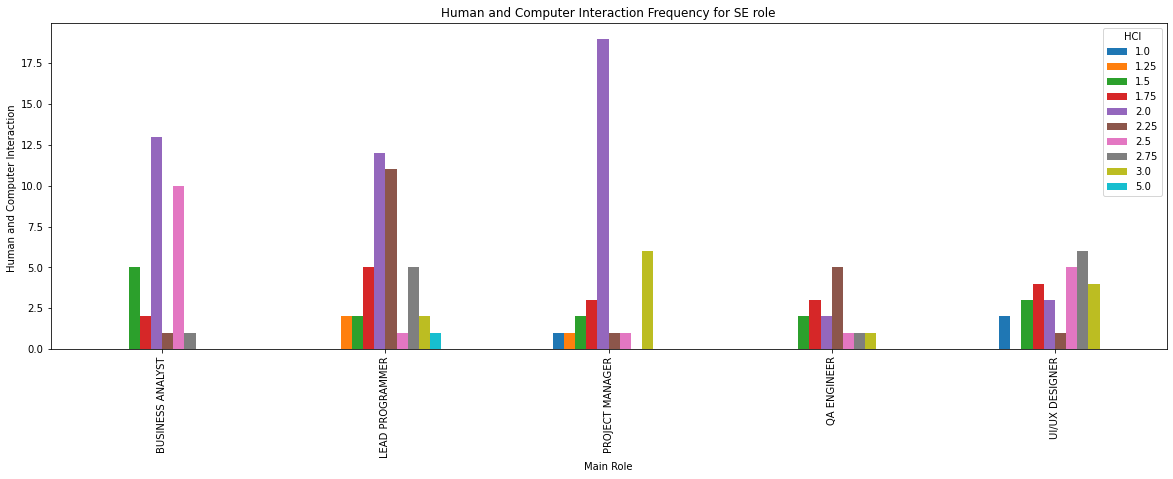

In [21]:
pd.crosstab(df['MAIN ROLE'],df['HCI']).plot(kind="bar",figsize=(20,6))
plt.title('Human and Computer Interaction Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Human and Computer Interaction ')
plt.show()

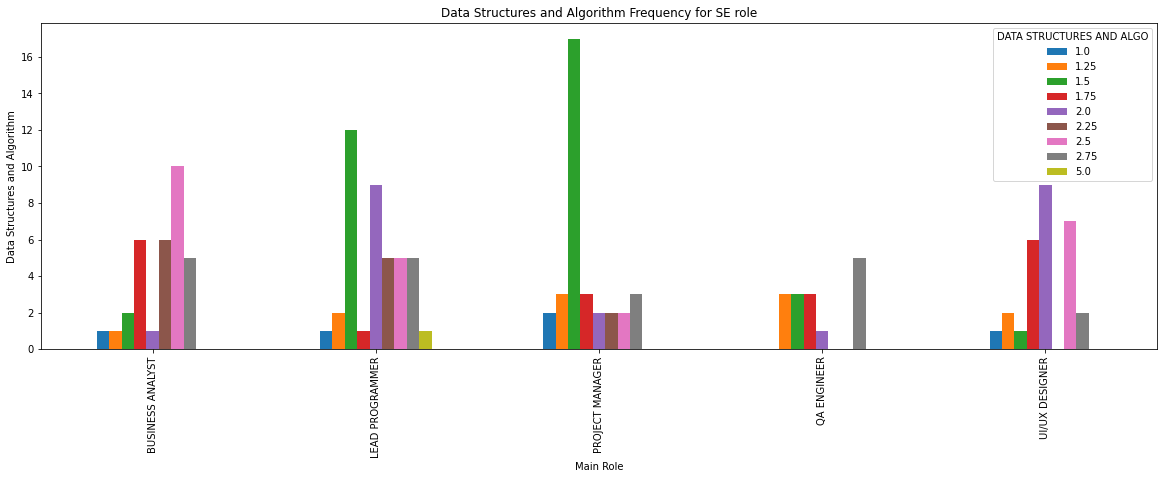

In [22]:
pd.crosstab(df['MAIN ROLE'],df['DATA STRUCTURES AND ALGO']).plot(kind="bar",figsize=(20,6))
plt.title('Data Structures and Algorithm Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Data Structures and Algorithm')
plt.show()

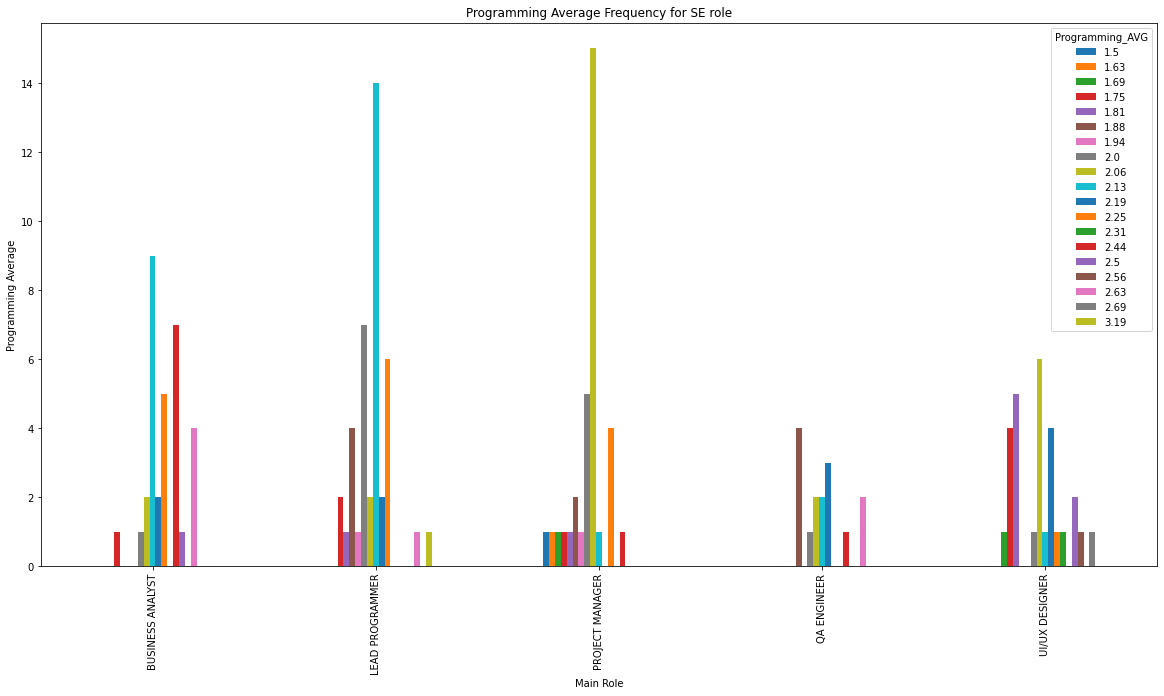

In [23]:
pd.crosstab(df['MAIN ROLE'],df['Programming_AVG']).plot(kind="bar",figsize=(20,10))
plt.title('Programming Average Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Programming Average')
plt.show()

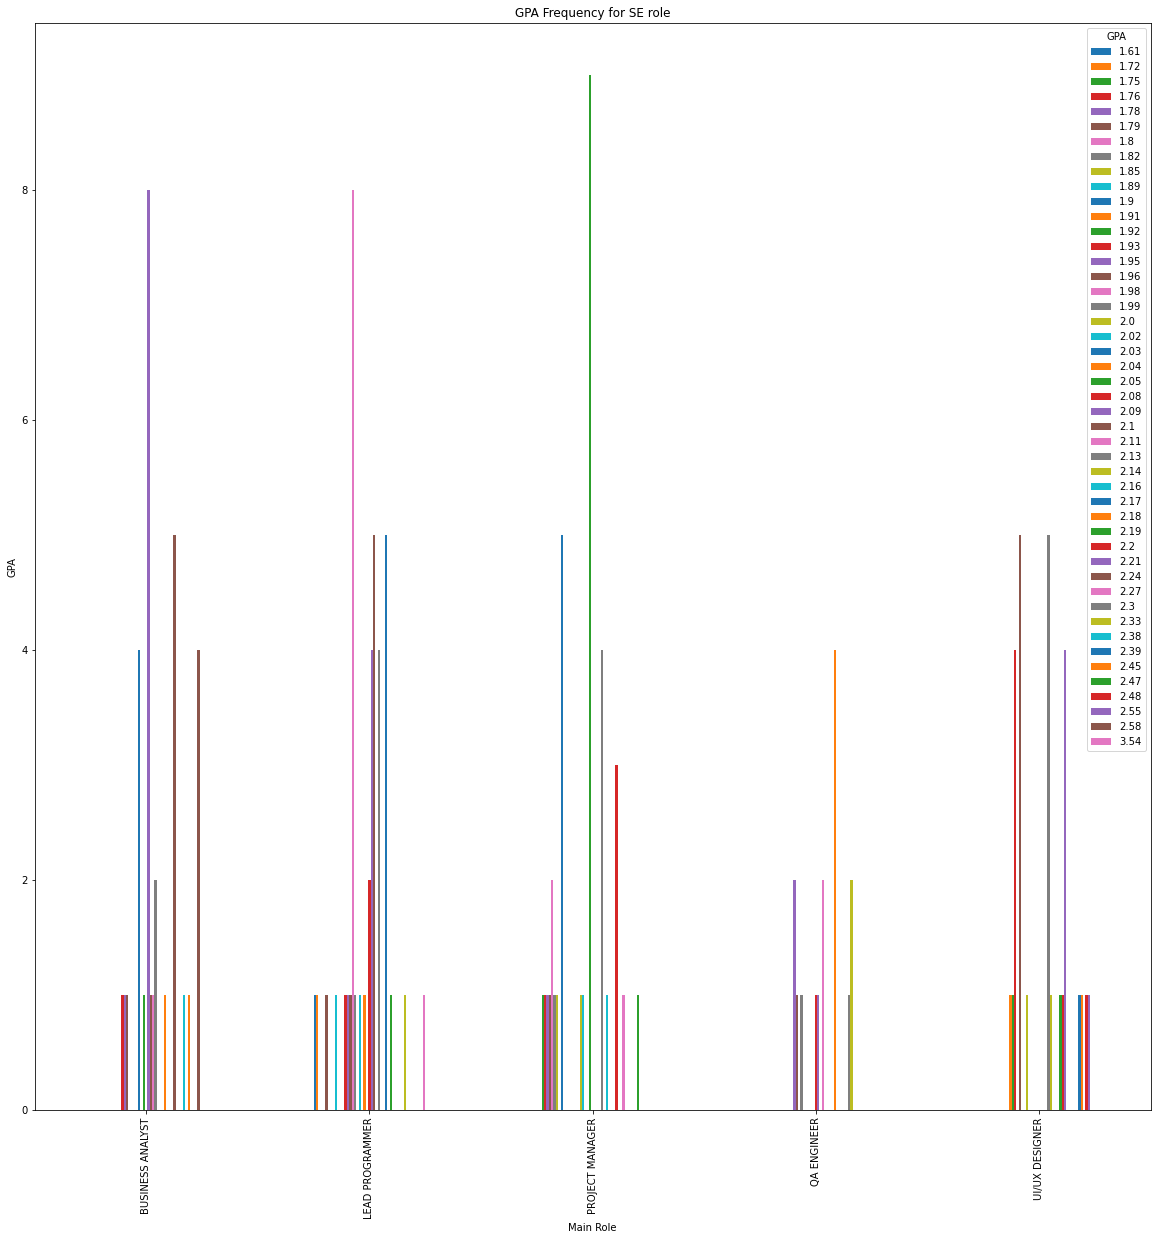

In [24]:
pd.crosstab(df['MAIN ROLE'],df['GPA']).plot(kind="bar",figsize=(20,20))
plt.title('GPA Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('GPA')
plt.show()

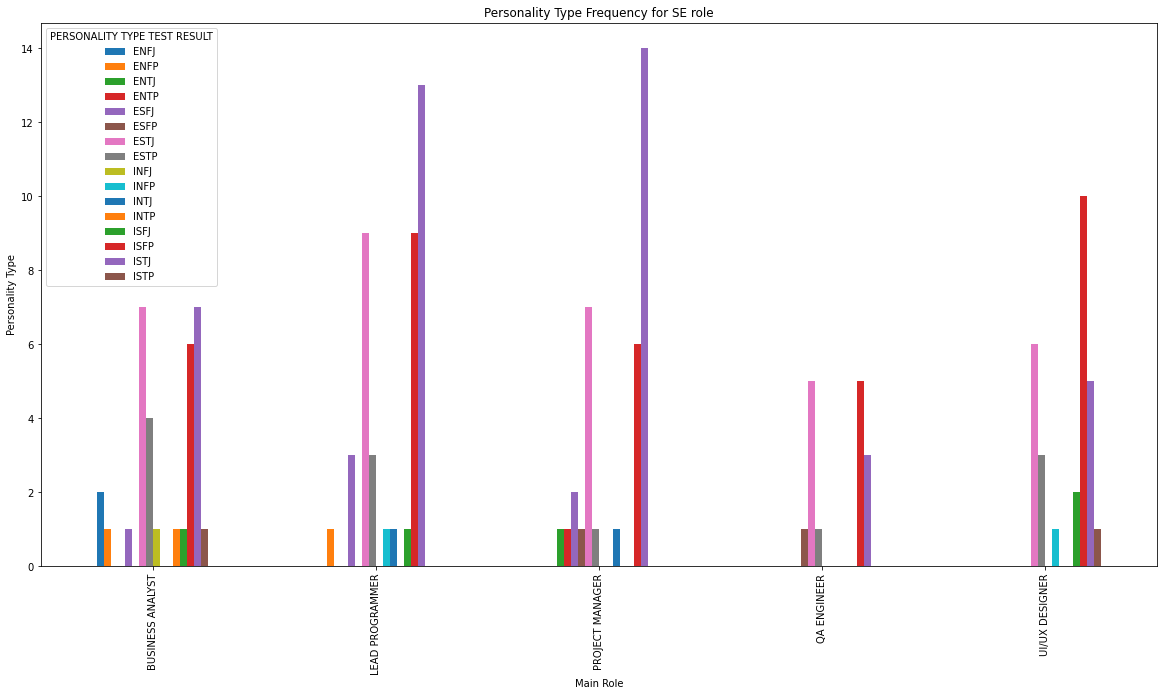

In [25]:
pd.crosstab(df['MAIN ROLE'],df['PERSONALITY TYPE TEST RESULT']).plot(kind="bar",figsize=(20,10))
plt.title('Personality Type Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Personality Type')
plt.show()

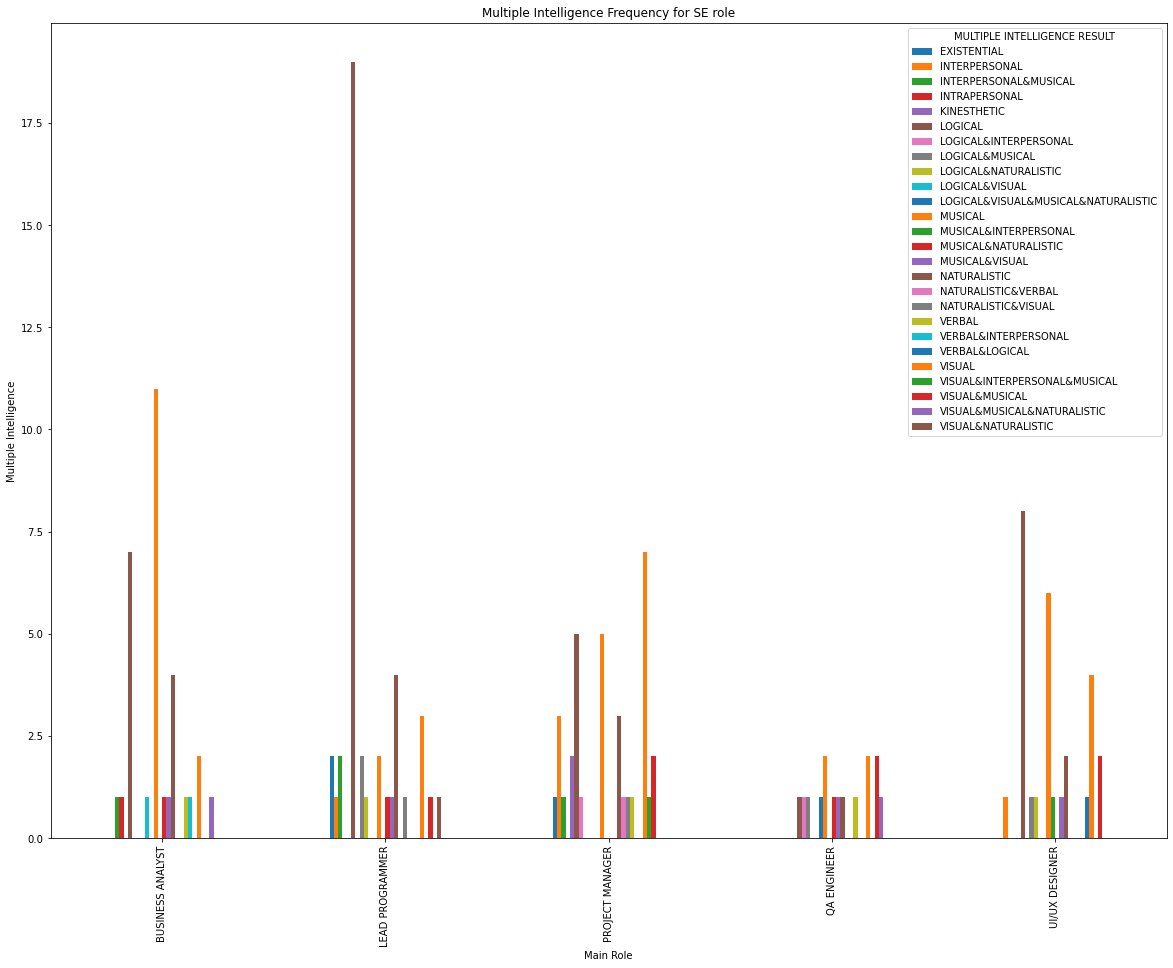

In [26]:
pd.crosstab(df['MAIN ROLE'],df['MULTIPLE INTELLIGENCE RESULT']).plot(kind="bar",figsize=(20,15))
plt.title('Multiple Intelligence Frequency for SE role')
plt.xlabel('Main Role')
plt.ylabel('Multiple Intelligence')
plt.show()

# checking correlation coefficients using pearson method

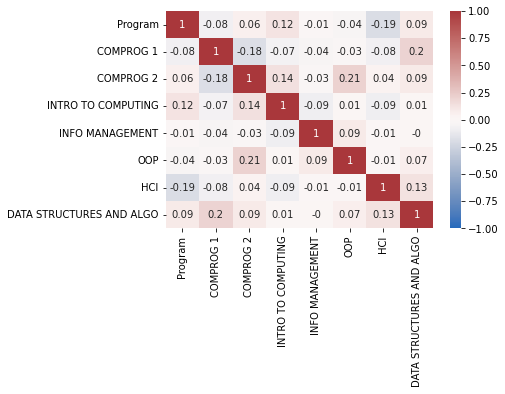

In [27]:
#checking the correlation coefficients of the main features using pearson method


main_variables = df[['Program','COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING', 'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO', 'PERSONALITY TYPE TEST RESULT', 'MULTIPLE INTELLIGENCE RESULT']]
main_variables

matrix_main = main_variables.corr(method = 'pearson', min_periods = 1).round(2)
#mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix_main, annot=True, vmax=1, vmin=-1, cmap='vlag')
plt.show()

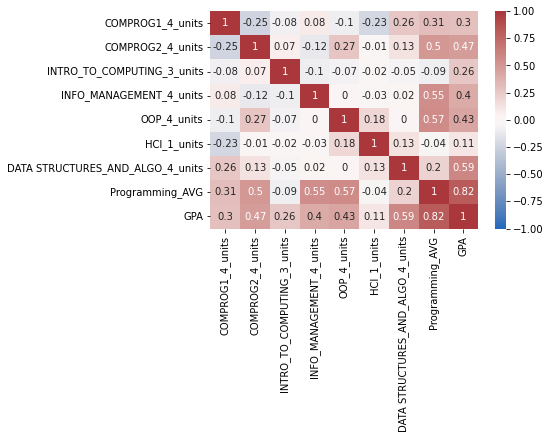

In [28]:
#checking the correlation coefficients of the derived features using pearson method

derived_variables = df[['COMPROG1_4_units','COMPROG2_4_units', 'INTRO_TO_COMPUTING_3_units', 'INFO_MANAGEMENT_4_units', 'OOP_4_units', 'HCI_1_units', 'DATA STRUCTURES_AND_ALGO_4_units', 'Programming_AVG', 'GPA']]
derived_variables

matrix_derived = derived_variables.corr(method = 'pearson', min_periods = 1).round(2)
#mask = np.triu(np.ones_like(matrix_derived, dtype=bool))
sns.heatmap(matrix_derived, annot=True, vmax=1, vmin=-1, cmap='vlag')
plt.show()

In [29]:
df

,Program,COMPROG 1,COMPROG 2,INTRO TO COMPUTING,INFO MANAGEMENT,OOP,HCI,DATA STRUCTURES AND ALGO,COMPROG1_4_units,COMPROG2_4_units,INTRO_TO_COMPUTING_3_units,INFO_MANAGEMENT_4_units,OOP_4_units,HCI_1_units,DATA STRUCTURES_AND_ALGO_4_units,Programming_AVG,GPA,PERSONALITY TYPE TEST RESULT,MULTIPLE INTELLIGENCE RESULT,MAIN ROLE
0,0,1.50,1.75,2.00,2.50,1.75,1.75,1.25,6,7,6.00,10,7,1.75,5,1.88,1.78,ESFJ,VISUAL,PROJECT MANAGER
1,0,1.75,2.00,1.75,2.75,1.75,1.50,1.75,7,8,5.25,11,7,1.50,7,2.06,1.95,INFP,NATURALISTIC,LEAD PROGRAMMER
2,0,1.50,2.00,1.50,3.00,2.00,2.50,1.50,6,8,4.50,12,8,2.50,6,2.13,1.96,ESTP,MUSICAL,BUSINESS ANALYST
3,0,1.75,2.25,2.25,1.50,2.50,3.00,1.50,7,9,6.75,6,10,3.00,6,2.00,1.99,ESTP,NATURALISTIC,LEAD PROGRAMMER
4,1,2.25,1.75,1.50,2.75,1.75,2.50,1.50,9,7,4.50,11,7,2.50,6,2.13,1.96,ESTJ,MUSICAL&NATURALISTIC,QA ENGINEER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,2.50,1.00,1.25,2.00,2.25,2.50,2.50,7,10,3.75,8,9,2.50,10,2.13,2.09,ESTJ,MUSICAL,BUSINESS ANALYST
146,0,1.50,1.50,3.00,3.00,1.75,2.00,1.50,8,6,8.25,12,7,2.00,6,2.06,2.05,ISTJ,EXISTENTIAL,PROJECT MANAGER
147,0,3.00,2.00,1.75,2.50,2.00,2.25,1.50,8,8,5.25,10,8,2.25,6,2.13,1.98,ENFP,LOGICAL,LEAD PROGRAMMER
148,1,2.00,2.00,1.25,2.00,2.25,2.50,2.50,7,10,3.75,8,9,2.50,10,2.13,2.09,ENFJ,INTRAPERSONAL,BUSINESS ANALYST


In [30]:
#checking and selecting if there are main features that has no correlation.
matrix_main = matrix_main.unstack()
matrix_main = matrix_main[abs(matrix_main) == 0.0]
print(matrix_main)

INFO MANAGEMENT           DATA STRUCTURES AND ALGO   -0.0
DATA STRUCTURES AND ALGO  INFO MANAGEMENT            -0.0
dtype: float64


In [31]:
#checking and selecting if there are derived features that has no correlation.
matrix_derived = matrix_derived.unstack()
matrix_derived = matrix_derived[abs(matrix_derived) == 0.0]
print(matrix_derived)

INFO_MANAGEMENT_4_units           OOP_4_units                         0.0
OOP_4_units                       INFO_MANAGEMENT_4_units             0.0
                                  DATA STRUCTURES_AND_ALGO_4_units    0.0
DATA STRUCTURES_AND_ALGO_4_units  OOP_4_units                         0.0
dtype: float64


# CONVERTING THE CATEGORICAL FEATURES INTO NUMERICAL FEATURES USING ONE HOT ENCODING.

In [32]:
#WE'VE CREATED AN OBJECT TO PASS THE CONVERTED CATEGORICAL DATA USING get_dummies() FUNCTION

In [33]:
new_columns_pt = pd.get_dummies(df['PERSONALITY TYPE TEST RESULT'])
new_columns_pt

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
new_columns_mi = df['MULTIPLE INTELLIGENCE RESULT'].str.get_dummies(sep='&')
new_columns_mi

,EXISTENTIAL,INTERPERSONAL,INTRAPERSONAL,KINESTHETIC,LOGICAL,MUSICAL,NATURALISTIC,VERBAL,VISUAL
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,1,0,0,0
146,1,0,0,0,0,0,0,0,0
147,0,0,0,0,1,0,0,0,0
148,0,0,1,0,0,0,0,0,0


In [35]:
#new_columns_pt_valid = df['PT_VALID'].str.get_dummies(sep='&')

#renamed_pt_valid = new_columns_pt_valid.rename(columns={'ENTJ': 'ENTJ_valid', 'INTJ': 'INTJ_valid', 'ISTJ': 'ISTJ_valid' })
#renamed_pt_valid

In [36]:
#new_columns_mi_valid = df['MI_VALID'].str.get_dummies(sep='&')

#renamed_mi_valid = new_columns_mi_valid.rename(columns={'INTERPERSONAL': 'INTERPERSONAL_valid', 'LOGICAL': 'LOGICAL_valid', 'VERBAL': 'VERBAL_valid', 'VISUAL': 'VISUAL_valid'})
#renamed_mi_valid

# Combining the newly created OHD features into the original data frame 

In [37]:
df = df.join(new_columns_pt)

In [38]:
df = df.join(new_columns_mi)

In [39]:
#df = df.join(renamed_pt_valid)

In [40]:
#df = df.join(renamed_mi_valid)

In [41]:
df

,Program,COMPROG 1,COMPROG 2,INTRO TO COMPUTING,INFO MANAGEMENT,OOP,HCI,DATA STRUCTURES AND ALGO,COMPROG1_4_units,COMPROG2_4_units,...,ISTP,EXISTENTIAL,INTERPERSONAL,INTRAPERSONAL,KINESTHETIC,LOGICAL,MUSICAL,NATURALISTIC,VERBAL,VISUAL
0,0,1.50,1.75,2.00,2.50,1.75,1.75,1.25,6,7,...,0,0,0,0,0,0,0,0,0,1
1,0,1.75,2.00,1.75,2.75,1.75,1.50,1.75,7,8,...,0,0,0,0,0,0,0,1,0,0
2,0,1.50,2.00,1.50,3.00,2.00,2.50,1.50,6,8,...,0,0,0,0,0,0,1,0,0,0
3,0,1.75,2.25,2.25,1.50,2.50,3.00,1.50,7,9,...,0,0,0,0,0,0,0,1,0,0
4,1,2.25,1.75,1.50,2.75,1.75,2.50,1.50,9,7,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,2.50,1.00,1.25,2.00,2.25,2.50,2.50,7,10,...,0,0,0,0,0,0,1,0,0,0
146,0,1.50,1.50,3.00,3.00,1.75,2.00,1.50,8,6,...,0,1,0,0,0,0,0,0,0,0
147,0,3.00,2.00,1.75,2.50,2.00,2.25,1.50,8,8,...,0,0,0,0,0,1,0,0,0,0
148,1,2.00,2.00,1.25,2.00,2.25,2.50,2.50,7,10,...,0,0,0,1,0,0,0,0,0,0


# Converting the categorical values of the column main role into numerical values using dummy encoding.

0 = LEAD PROGRAMMER,
1 = PROJECT MANAGER,
2 = UI/UX DESIGNER,
3 = QA ENGINEER,
4 = BUSINESS ANALYST,


In [42]:
dict_target = {'LEAD PROGRAMMER':0, 'PROJECT MANAGER':1, 'UI/UX DESIGNER':2, 'QA ENGINEER':3, 'BUSINESS ANALYST':4}
df['MAIN_ROLE_CATEGORICAL'] = df['MAIN ROLE'].map(dict_target)


# Dropping the categorical features of the dataframe

In [43]:
df.drop(columns = ['PERSONALITY TYPE TEST RESULT', 'MULTIPLE INTELLIGENCE RESULT', 'MAIN ROLE'], inplace=True)

In [44]:
df.isnull().sum()

Program                             0
COMPROG 1                           0
COMPROG 2                           0
INTRO TO COMPUTING                  0
INFO MANAGEMENT                     0
OOP                                 0
HCI                                 0
DATA STRUCTURES AND ALGO            0
COMPROG1_4_units                    0
COMPROG2_4_units                    0
INTRO_TO_COMPUTING_3_units          0
INFO_MANAGEMENT_4_units             0
OOP_4_units                         0
HCI_1_units                         0
DATA STRUCTURES_AND_ALGO_4_units    0
Programming_AVG                     0
GPA                                 0
ENFJ                                0
ENFP                                0
ENTJ                                0
ENTP                                0
ESFJ                                0
ESFP                                0
ESTJ                                0
ESTP                                0
INFJ                                0
INFP        

In [45]:
df.tail(5)

,Program,COMPROG 1,COMPROG 2,INTRO TO COMPUTING,INFO MANAGEMENT,OOP,HCI,DATA STRUCTURES AND ALGO,COMPROG1_4_units,COMPROG2_4_units,...,EXISTENTIAL,INTERPERSONAL,INTRAPERSONAL,KINESTHETIC,LOGICAL,MUSICAL,NATURALISTIC,VERBAL,VISUAL,MAIN_ROLE_CATEGORICAL
145,0,2.5,1.0,1.25,2.0,2.25,2.50,2.5,7,10,...,0,0,0,0,0,1,0,0,0,4
146,0,1.5,1.5,3.00,3.0,1.75,2.00,1.5,8,6,...,1,0,0,0,0,0,0,0,0,1
147,0,3.0,2.0,1.75,2.5,2.00,2.25,1.5,8,8,...,0,0,0,0,1,0,0,0,0,0
148,1,2.0,2.0,1.25,2.0,2.25,2.50,2.5,7,10,...,0,0,1,0,0,0,0,0,0,4
149,0,1.0,1.5,2.75,3.0,1.75,2.00,1.5,8,6,...,0,0,0,1,0,0,0,0,0,1


In [46]:
df.columns

Index(['Program', 'COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING',
       'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO',
       'COMPROG1_4_units', 'COMPROG2_4_units', 'INTRO_TO_COMPUTING_3_units',
       'INFO_MANAGEMENT_4_units', 'OOP_4_units', 'HCI_1_units',
       'DATA STRUCTURES_AND_ALGO_4_units', 'Programming_AVG', 'GPA', 'ENFJ',
       'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP',
       'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'EXISTENTIAL',
       'INTERPERSONAL', 'INTRAPERSONAL', 'KINESTHETIC', 'LOGICAL', 'MUSICAL',
       'NATURALISTIC', 'VERBAL', 'VISUAL', 'MAIN_ROLE_CATEGORICAL'],
      dtype='object')

In [47]:
#return the number of duplicates
df.filter(like='LOGIC')

,LOGICAL
0,0
1,0
2,0
3,0
4,0
...,...
145,0
146,0
147,1
148,0


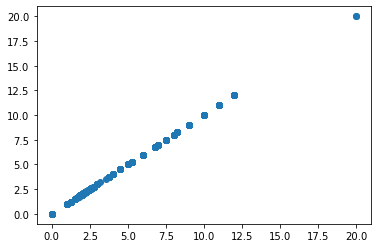

In [48]:
#PLOT THE WHOLE DATA SET USING SCATTER PLOT
plt.scatter(df, df)

# Storing the features and output values to variables.

In [49]:
features=df.columns[:-1].values
features

array(['Program', 'COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING',
       'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO',
       'COMPROG1_4_units', 'COMPROG2_4_units',
       'INTRO_TO_COMPUTING_3_units', 'INFO_MANAGEMENT_4_units',
       'OOP_4_units', 'HCI_1_units', 'DATA STRUCTURES_AND_ALGO_4_units',
       'Programming_AVG', 'GPA', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ',
       'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ',
       'ISFP', 'ISTJ', 'ISTP', 'EXISTENTIAL', 'INTERPERSONAL',
       'INTRAPERSONAL', 'KINESTHETIC', 'LOGICAL', 'MUSICAL',
       'NATURALISTIC', 'VERBAL', 'VISUAL'], dtype=object)

In [50]:
target=df.columns[-1:]
target


Index(['MAIN_ROLE_CATEGORICAL'], dtype='object')

# Splitting the dataset using train_test_split with 20% records for testing and 80% records for training of the dataset.

In [51]:
#split and test

from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2, random_state=5)
test.head(5)

,Program,COMPROG 1,COMPROG 2,INTRO TO COMPUTING,INFO MANAGEMENT,OOP,HCI,DATA STRUCTURES AND ALGO,COMPROG1_4_units,COMPROG2_4_units,...,EXISTENTIAL,INTERPERSONAL,INTRAPERSONAL,KINESTHETIC,LOGICAL,MUSICAL,NATURALISTIC,VERBAL,VISUAL,MAIN_ROLE_CATEGORICAL
82,1,2.50,2.25,1.50,2.75,1.25,1.50,2.50,10,9,...,0,0,0,0,0,0,0,0,1,2
134,1,3.00,2.00,1.00,2.75,2.50,2.00,2.25,10,8,...,0,0,0,0,0,0,1,0,0,4
114,0,2.00,2.00,1.75,2.50,2.00,2.25,1.50,8,8,...,0,0,0,0,1,0,0,0,0,0
42,0,2.75,1.50,2.00,1.50,2.00,1.50,1.50,11,6,...,0,1,0,0,0,1,0,0,1,1
109,0,2.75,3.00,2.50,2.50,2.25,1.50,2.75,11,12,...,0,0,0,0,0,1,0,0,0,4


# Spot Check Algorithms and Show evaluation metrics (k-fold cross validation, accuracy, and confusion matrix)

In [52]:
#spot check algorithm using accuracy

# Algorithms
#Logistic Regression, Decision Tree, Naive bayes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import mean
from numpy import std
import numpy as np
import math

In [53]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

#define the models to be used
models = dict()
models['dtc'] = DecisionTreeClassifier()
models['lr'] = LogisticRegression()
models['nb'] = GaussianNB()

dtc = DecisionTreeClassifier()
log_reg = LogisticRegression()
naive = GaussianNB()

#check model performance using cross validation
for name, model in models.items():
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(model, X_train, Y_train, cv = cv, n_jobs = 1, error_score = 'raise')
    print(name, '\n5-Fold Validation Scores:\n', scores)
    print('Cross Validation Training Accuracy: %.3f (%.3f)\n' % (mean(scores), std(scores)))


dtc 
5-Fold Validation Scores:
 [0.5        0.625      0.45833333 0.58333333 0.58333333]
Cross Validation Training Accuracy: 0.550 (0.061)



C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

lr 
5-Fold Validation Scores:
 [0.25       0.54166667 0.16666667 0.41666667 0.375     ]
Cross Validation Training Accuracy: 0.350 (0.131)

nb 
5-Fold Validation Scores:
 [0.08333333 0.20833333 0.25       0.125      0.125     ]
Cross Validation Training Accuracy: 0.158 (0.061)



C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

# Training the models

In [54]:
results = dict()
for name, model in models.items():
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    print('\nAlgorithm: ', name)
    res_cm = confusion_matrix(Y_test, predicted)
    print('Confusion Matrix:\n', res_cm)
    res_acc = accuracy_score(Y_test, predicted)
    print('Accuracy: ', res_acc)
    results[name]=res_acc
    

C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Algorithm:  dtc
Confusion Matrix:
 [[4 1 1 0 0]
 [0 6 0 0 0]
 [5 1 3 0 1]
 [1 0 0 0 0]
 [1 0 0 1 5]]
Accuracy:  0.6

Algorithm:  lr
Confusion Matrix:
 [[4 2 0 0 0]
 [2 2 0 1 1]
 [2 1 3 2 2]
 [1 0 0 0 0]
 [1 1 0 0 5]]
Accuracy:  0.4666666666666667

Algorithm:  nb
Confusion Matrix:
 [[0 1 1 4 0]
 [2 0 0 4 0]
 [0 0 2 8 0]
 [1 0 0 0 0]
 [1 0 0 5 1]]
Accuracy:  0.1


C:\Users\drene\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [55]:
#df_filtered = matrix.to_frame()
#df_filtered.unstack()

In [56]:
df.columns

Index(['Program', 'COMPROG 1', 'COMPROG 2', 'INTRO TO COMPUTING',
       'INFO MANAGEMENT', 'OOP', 'HCI', 'DATA STRUCTURES AND ALGO',
       'COMPROG1_4_units', 'COMPROG2_4_units', 'INTRO_TO_COMPUTING_3_units',
       'INFO_MANAGEMENT_4_units', 'OOP_4_units', 'HCI_1_units',
       'DATA STRUCTURES_AND_ALGO_4_units', 'Programming_AVG', 'GPA', 'ENFJ',
       'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP',
       'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'EXISTENTIAL',
       'INTERPERSONAL', 'INTRAPERSONAL', 'KINESTHETIC', 'LOGICAL', 'MUSICAL',
       'NATURALISTIC', 'VERBAL', 'VISUAL', 'MAIN_ROLE_CATEGORICAL'],
      dtype='object')

In [57]:
df.isnull().sum()

Program                             0
COMPROG 1                           0
COMPROG 2                           0
INTRO TO COMPUTING                  0
INFO MANAGEMENT                     0
OOP                                 0
HCI                                 0
DATA STRUCTURES AND ALGO            0
COMPROG1_4_units                    0
COMPROG2_4_units                    0
INTRO_TO_COMPUTING_3_units          0
INFO_MANAGEMENT_4_units             0
OOP_4_units                         0
HCI_1_units                         0
DATA STRUCTURES_AND_ALGO_4_units    0
Programming_AVG                     0
GPA                                 0
ENFJ                                0
ENFP                                0
ENTJ                                0
ENTP                                0
ESFJ                                0
ESFP                                0
ESTJ                                0
ESTP                                0
INFJ                                0
INFP        

In [58]:
#checking the result of the models based on the confusion matrix
print(results)

{'dtc': 0.6, 'lr': 0.4666666666666667, 'nb': 0.1}


In [59]:
#exporting the cleaned data set
#df_filtered_data_set = df
#df_filtered_data_set.to_csv('MAIN-ROLE-CLEANED-DATASET.csv')

In [60]:
df

,Program,COMPROG 1,COMPROG 2,INTRO TO COMPUTING,INFO MANAGEMENT,OOP,HCI,DATA STRUCTURES AND ALGO,COMPROG1_4_units,COMPROG2_4_units,...,EXISTENTIAL,INTERPERSONAL,INTRAPERSONAL,KINESTHETIC,LOGICAL,MUSICAL,NATURALISTIC,VERBAL,VISUAL,MAIN_ROLE_CATEGORICAL
0,0,1.50,1.75,2.00,2.50,1.75,1.75,1.25,6,7,...,0,0,0,0,0,0,0,0,1,1
1,0,1.75,2.00,1.75,2.75,1.75,1.50,1.75,7,8,...,0,0,0,0,0,0,1,0,0,0
2,0,1.50,2.00,1.50,3.00,2.00,2.50,1.50,6,8,...,0,0,0,0,0,1,0,0,0,4
3,0,1.75,2.25,2.25,1.50,2.50,3.00,1.50,7,9,...,0,0,0,0,0,0,1,0,0,0
4,1,2.25,1.75,1.50,2.75,1.75,2.50,1.50,9,7,...,0,0,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,2.50,1.00,1.25,2.00,2.25,2.50,2.50,7,10,...,0,0,0,0,0,1,0,0,0,4
146,0,1.50,1.50,3.00,3.00,1.75,2.00,1.50,8,6,...,1,0,0,0,0,0,0,0,0,1
147,0,3.00,2.00,1.75,2.50,2.00,2.25,1.50,8,8,...,0,0,0,0,1,0,0,0,0,0
148,1,2.00,2.00,1.25,2.00,2.25,2.50,2.50,7,10,...,0,0,1,0,0,0,0,0,0,4


# Selecting and Deploying the best model according to the evaluation metrics (k-fold validation, accuracy, and confusion matrix)

In [61]:
import pickle
pickle.dump(models['dtc'], open('main_final_model.pkl', 'wb'))

# Batch Predictions

In [62]:
test_model = pickle.load(open('main_final_model.pkl', 'rb'))

In [63]:
new_Xdata = X_test.sample(10)
new_Ydata = Y_test['MAIN_ROLE_CATEGORICAL'].loc[new_Xdata.index.values]
print(new_Xdata)

     Program  COMPROG 1  COMPROG 2  INTRO TO COMPUTING  INFO MANAGEMENT   OOP  \
1          0       1.75       2.00                1.75             2.75  1.75   
42         0       2.75       1.50                2.00             1.50  2.00   
74         1       1.00       2.50                1.75             3.00  2.00   
26         1       2.00       1.50                1.75             1.50  1.00   
66         0       1.50       1.25                2.75             2.25  2.25   
132        1       1.00       2.00                1.00             3.00  2.00   
48         1       1.25       3.00                1.75             1.75  2.75   
72         0       1.00       2.00                3.00             2.00  1.00   
133        0       3.00       3.00                2.00             2.75  2.00   
107        0       1.50       2.75                1.75             2.75  1.50   

      HCI  DATA STRUCTURES AND ALGO  COMPROG1_4_units  COMPROG2_4_units  ...  \
1    1.50                   

In [64]:
print(new_Ydata)

1      0
42     1
74     2
26     1
66     2
132    2
48     3
72     4
133    0
107    0
Name: MAIN_ROLE_CATEGORICAL, dtype: int64


In [65]:
#predictions by the model
pred = test_model.predict(new_Xdata)
print(pred)

[0 1 0 1 2 2 0 4 0 0]


In [66]:
print(new_Ydata.values)

[0 1 2 1 2 2 3 4 0 0]


In [67]:
#checing for the accuracy score using confusion matrix
res_cm = confusion_matrix (new_Ydata, pred)
print('Confusion Matrix:\n', res_cm)
res_acc = accuracy_score(new_Ydata, pred)
print('Accuracy Score:\n', res_acc)

Confusion Matrix:
 [[3 0 0 0 0]
 [0 2 0 0 0]
 [1 0 2 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]]
Accuracy Score:
 0.8
